In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
df = pd.read_csv('export_data.csv')

/Users/yoonsunghong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,culture_ngram_count,relational_ngram_count,demographic_ngram_count,word_count,primary_subject,year,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine
0,0,9,11,10,3529,Sociology,1978,0.666242,0.659942,0.644007
1,1,10,27,7,5195,Management & Organizational Behavior,1986,0.675870,0.610163,0.532780
2,2,57,61,26,7100,Sociology,1983,0.688963,0.669807,0.646967
3,3,2,4,0,315,Management & Organizational Behavior,1985,0.662404,0.618887,0.537290
4,4,74,91,30,7110,Management & Organizational Behavior,2005,0.784473,0.732319,0.678748


In [4]:
df['culture_ratio'] = df['culture_ngram_count']/df['word_count']
df['demographic_ratio'] = df['demographic_ngram_count']/df['word_count']
df['relational_ratio'] = df['relational_ngram_count']/df['word_count']

df['culture_word2vec'] = df['culture_word2vec_cosine'] #/df['word_count']
df['demographic_word2vec'] = df['demographic_word2vec_cosine'] #/df['word_count']
df['relational_word2vec'] = df['relational_word2vec_cosine'] #/df['word_count']

In [5]:
#normalization
df['culture_ratio'] = (df['culture_ratio'] - df['culture_ratio'].min())/(df['culture_ratio'].max() - df['culture_ratio'].min())
df['demographic_ratio'] = (df['demographic_ratio'] - df['demographic_ratio'].min())/(df['demographic_ratio'].max() - df['demographic_ratio'].min())
df['relational_ratio'] = (df['relational_ratio'] - df['relational_ratio'].min())/(df['relational_ratio'].max() - df['relational_ratio'].min())


In [27]:
df.year_transform.unique()

array([1978, 1986, 1983, 1985, 2005, 1990, 1977, 2009, 2000, 2013, 1996,
       2012, 2011, 1995, 1987, 1991, 2006, 2007, 1979, 1993, 1999, 1980,
       1981, 1976, 2008, 1972, 1971, 1974, 1994, 1988, 2002, 1982, 2001,
       1975, 2004, 2010, 1998, 1989, 1973, 1997, 1992, 2014, 2003, 2015,
       1984])

In [10]:
def year_change(x):
    try:
        return(int(x))
    except:
        return(int(x[:4]))

In [11]:
df['year_transform'] = df.year.apply(lambda x: year_change(x))

In [12]:
df_avg = df.groupby(by=['year_transform']).mean()

In [13]:
df_avg = df_avg.reset_index()

In [14]:
df_avg.head()

,year_transform,Unnamed: 0,culture_ngram_count,relational_ngram_count,demographic_ngram_count,word_count,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec
0,1971,34819.645161,17.373167,37.541056,13.721408,4558.380499,0.656973,0.617462,0.589816,0.034550,0.038342,0.075253,0.589816,0.617462,0.656973
1,1972,34699.188725,16.714052,36.923203,13.424020,4479.852124,0.659029,0.617046,0.591396,0.033121,0.037297,0.079830,0.591396,0.617046,0.659029
2,1973,35376.295185,21.266574,43.034892,15.679693,4731.087927,0.664850,0.622651,0.599180,0.038663,0.041847,0.084831,0.599180,0.622651,0.664850
3,1974,34413.985248,18.333075,41.133540,15.875000,4783.451087,0.661307,0.618045,0.592606,0.034455,0.042974,0.082473,0.592606,0.618045,0.661307
4,1975,35070.728535,19.758838,51.916035,17.356061,5119.929293,0.672368,0.628790,0.599058,0.032789,0.043799,0.093006,0.599058,0.628790,0.672368


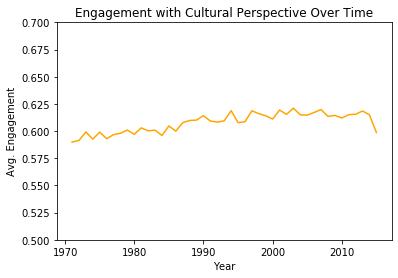

In [15]:
ax = sns.lineplot(x="year_transform", y="culture_word2vec_cosine", data=df_avg, color = 'orange')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Cultural Perspective Over Time')
plt.show()

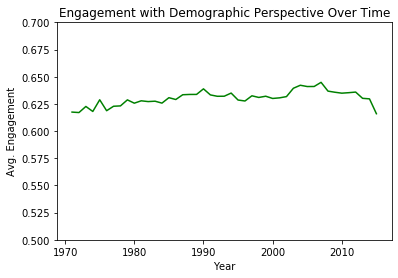

In [16]:
ax = sns.lineplot(x="year_transform", y="demographic_word2vec_cosine", data=df_avg, color = 'green')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Demographic Perspective Over Time')
plt.show()

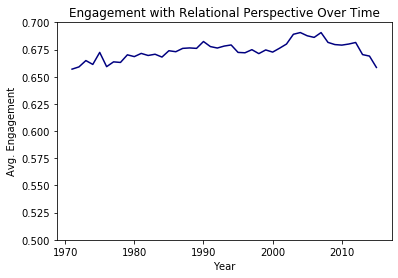

In [17]:
ax = sns.lineplot(x="year_transform", y="relational_word2vec_cosine", data=df_avg, color = 'navy')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Relational Perspective Over Time')
plt.show()

In [18]:
df_new = df[df['culture_word2vec_cosine'].isnull() == False]

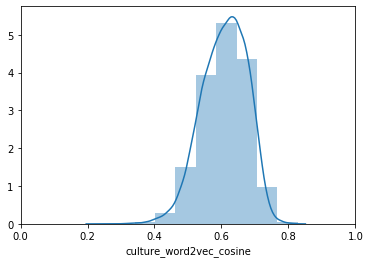

In [19]:
ax = sns.distplot(df_new["culture_word2vec_cosine"], bins = 10)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
# ax.set_title('Engagement with Cultural Perspective Over Time')
plt.show()

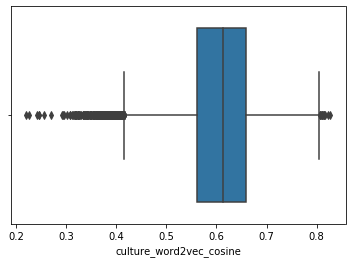

In [20]:
ax = sns.boxplot(x = df_new["culture_word2vec_cosine"])
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(xlim=(0, 1))
# ax.set_title('Engagement with Cultural Perspective Over Time')
plt.show()

In [21]:
print("Skew of Distribution") 
print(df_new["culture_word2vec_cosine"].skew())

Skew of Distribution
-0.382063250926613


In [111]:
df_avg_sociology = df[df['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_sociology = df_avg_sociology.reset_index()

In [112]:
df_avg_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_management = df_avg_management.reset_index()

In [113]:
df_avg_sociology = df_avg_sociology[['relational_word2vec','culture_word2vec','demographic_word2vec',
                                                           'culture_ratio', 'demographic_ratio',
                                                           'relational_ratio','year_transform']]
df_avg_sociology['percentile'] = '50th'

df_avg_management = df_avg_management[['relational_word2vec','culture_word2vec','demographic_word2vec',
                                                           'culture_ratio', 'demographic_ratio',
                                                           'relational_ratio','year_transform']]
df_avg_management['percentile'] = '50th'

In [114]:
df_25_sociology = df[df['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_sociology = df_25_sociology.reset_index()

df_75_sociology = df[df['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_sociology = df_75_sociology.reset_index()



df_25_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                        'year_transform']].groupby(by=['year_transform']).quantile(0.25)
df_25_management = df_25_management.reset_index()

df_75_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                        'year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_management = df_75_management.reset_index()

In [115]:
df_25_sociology['percentile'] = '25th'
df_25_management['percentile'] = '25th'

df_75_sociology['percentile'] = '75th'
df_75_management['percentile'] = '75th'

In [116]:
df_sociology = pd.concat([df_25_sociology, df_avg_sociology, df_75_sociology])
df_management = pd.concat([df_25_management, df_avg_management, df_75_management])

/Users/yoonsunghong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/Users/yoonsunghong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# Raw ratio

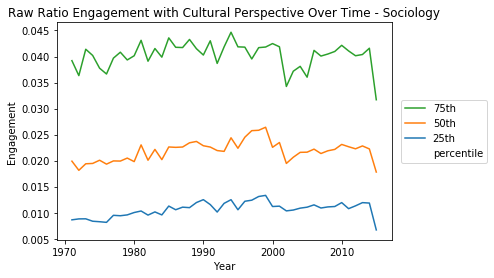

In [117]:
ax = sns.lineplot(x="year_transform", y="culture_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Raw Ratio Engagement with Cultural Perspective Over Time - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)


plt.show()

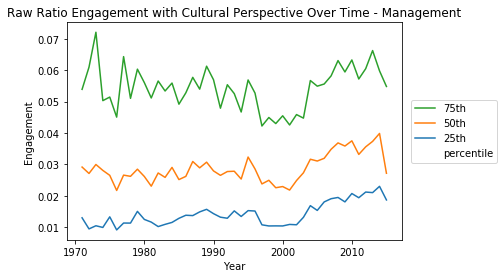

In [118]:
ax = sns.lineplot(x="year_transform", y="culture_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Raw Ratio Engagement with Cultural Perspective Over Time - Management')
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.show()

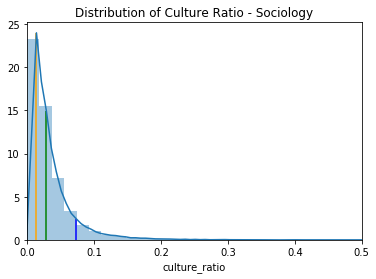

Skew of Distribution
3.9429023946970725


In [69]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["culture_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))

ax.set_title('Distribution of Culture Ratio - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["culture_ratio"].skew())

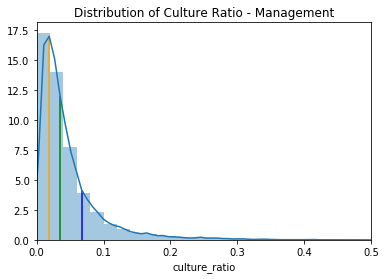

Skew of Distribution
3.3484821604648936


In [70]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Culture Ratio - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_ratio"].skew())

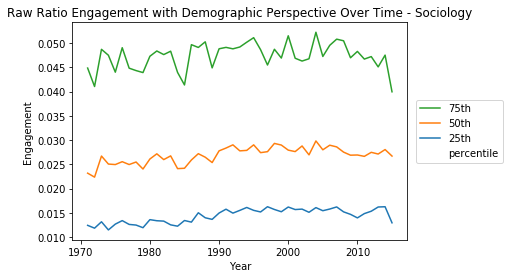

In [119]:
ax = sns.lineplot(x="year_transform", y="demographic_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Raw Ratio Engagement with Demographic Perspective Over Time - Sociology')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.show()

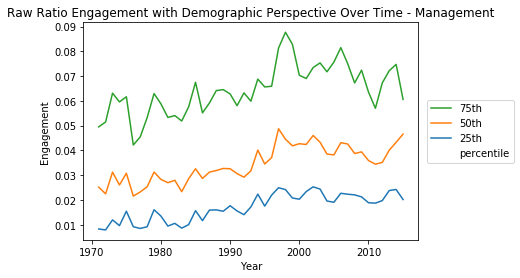

In [120]:
ax = sns.lineplot(x="year_transform", y="demographic_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Raw Ratio Engagement with Demographic Perspective Over Time - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.show()

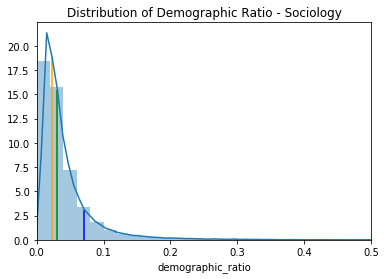

Skew of Distribution
4.986486060249517


In [121]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["demographic_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Demographic Ratio - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["demographic_ratio"].skew())

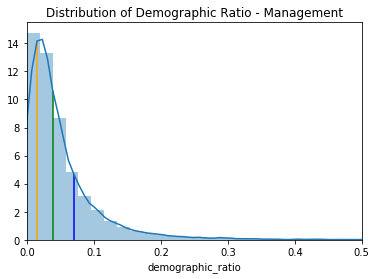

Skew of Distribution
3.711820015001856


In [122]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Demographic Ratio - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_ratio"].skew())

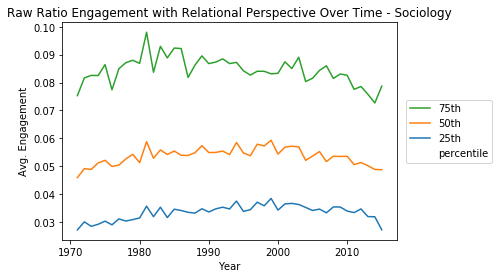

In [123]:
ax = sns.lineplot(x="year_transform", y="relational_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Raw Ratio Engagement with Relational Perspective Over Time - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.show()

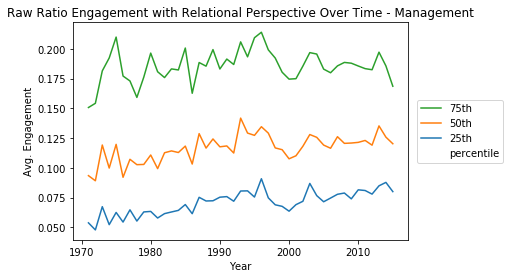

In [124]:
ax = sns.lineplot(x="year_transform", y="relational_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Raw Ratio Engagement with Relational Perspective Over Time - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

plt.show()

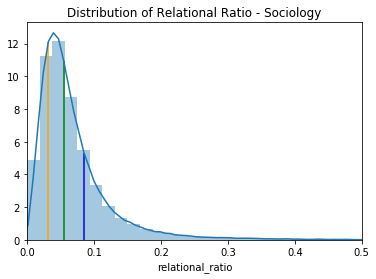

Skew of Distribution
3.7554180250430806


In [125]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["relational_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Relational Ratio - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["relational_ratio"].skew())

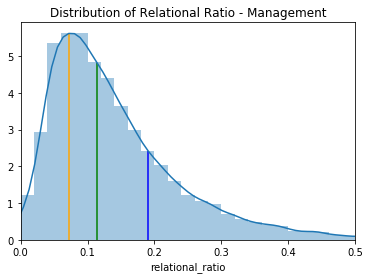

Skew of Distribution
1.745815618031985


In [126]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Relational Ratio - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_ratio"].skew())

# Cosine 

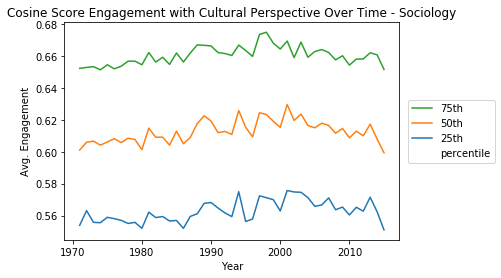

In [127]:
ax = sns.lineplot(x="year_transform", y="culture_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Score Engagement with Cultural Perspective Over Time - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

plt.show()

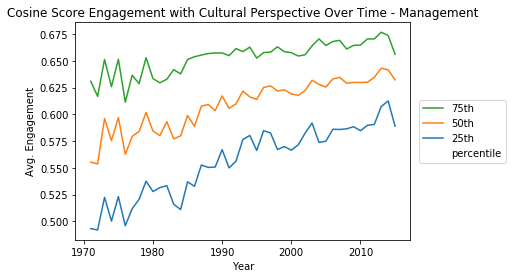

In [129]:
ax = sns.lineplot(x="year_transform", y="culture_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Score Engagement with Cultural Perspective Over Time - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

plt.show()

/Users/yoonsunghong/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yoonsunghong/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/yoonsunghong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/yoonsunghong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


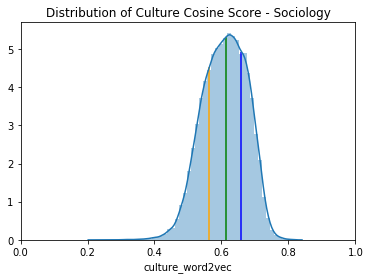

Skew of Distribution
-0.283524582749891


In [130]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["culture_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Culture Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["culture_word2vec"].skew())

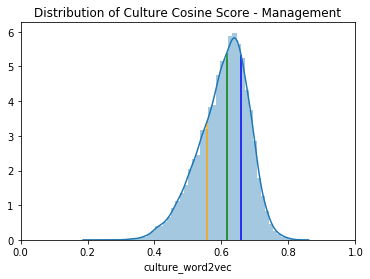

Skew of Distribution
-0.5408680014627661


In [131]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Culture Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_word2vec"].skew())

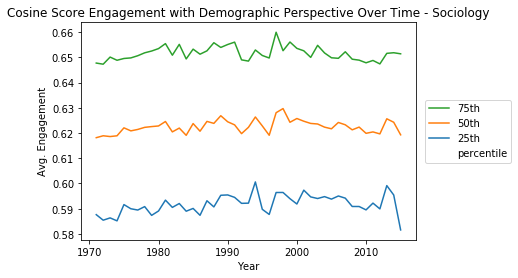

In [132]:
ax = sns.lineplot(x="year_transform", y="demographic_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Score Engagement with Demographic Perspective Over Time - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

plt.show()

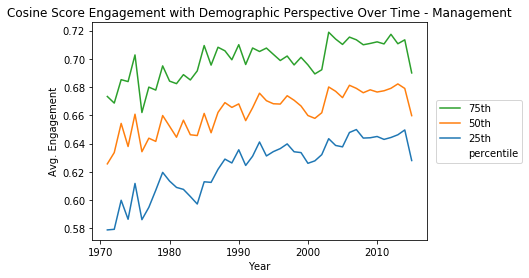

In [134]:
ax = sns.lineplot(x="year_transform", y="demographic_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Score Engagement with Demographic Perspective Over Time - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

plt.show()

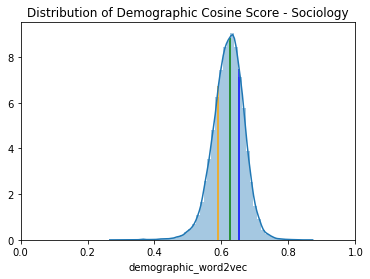

Skew of Distribution
-0.44701565471383925


In [135]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["demographic_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Demographic Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["demographic_word2vec"].skew())

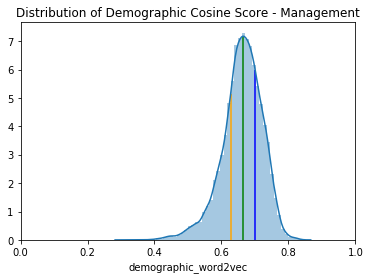

Skew of Distribution
-0.6865250921507555


In [136]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Demographic Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_word2vec"].skew())

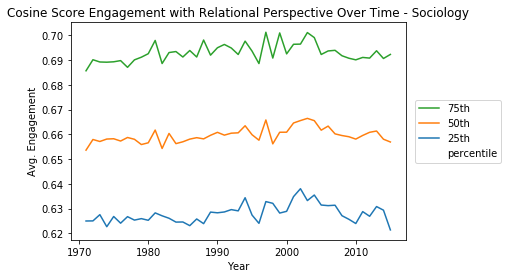

In [137]:
ax = sns.lineplot(x="year_transform", y="relational_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Score Engagement with Relational Perspective Over Time - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

plt.show()

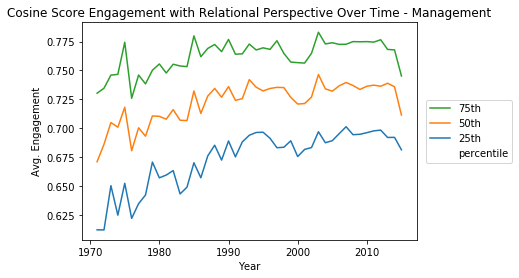

In [139]:
ax = sns.lineplot(x="year_transform", y="relational_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Score Engagement with Relational Perspective Over Time - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

plt.show()

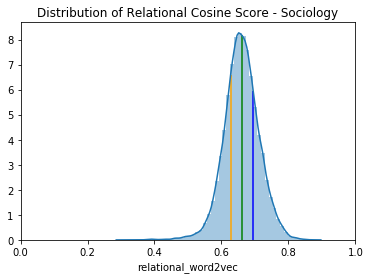

Skew of Distribution
-0.26172523252001667


In [140]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["relational_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Relational Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["relational_word2vec"].skew())

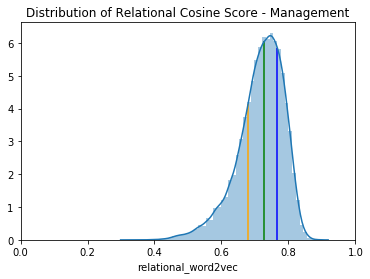

Skew of Distribution
-0.8987081714524771


In [141]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Relational Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_word2vec"].skew())